In [ ]:
from google.colab import files
uploaded = files.upload()


Saving housing_prices - housing_prices.csv to housing_prices - housing_prices.csv


Iterative GD prediction for 2500 sq ft: 429673.98


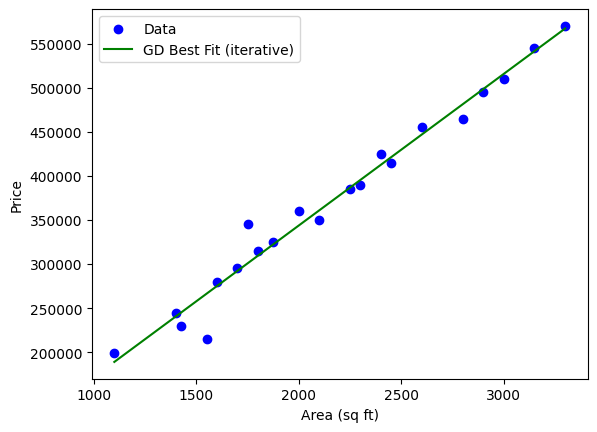

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def load_data(path):
    areas = []
    prices = []
    with open(path, "r") as f:
        header = f.readline()
        for line in f:
            line = line.strip()
            if not line:
                continue
            parts = line.split(",")
            x = float(parts[0])
            y = float(parts[-1])
            areas.append(x)
            prices.append(y)
    return areas, prices

def gradient_descent(x_list, y_list, lr=1e-6, epochs=20000):
    x = np.array(x_list, dtype=float)
    y = np.array(y_list, dtype=float)
    n = len(x)

    # initial guesses
    m = 0.0
    b = 0.0

    for _ in range(epochs):
        y_pred = m * x + b
        error = y_pred - y

        # gradients of MSE w.r.t m and b
        dm = (2.0 / n) * np.sum(error * x)
        db = (2.0 / n) * np.sum(error)

        # iterative update (gradient descent step)
        m -= lr * dm
        b -= lr * db

    return m, b

def predict(m, b, x):
    return m * x + b


x_list, y_list = load_data("housing_data.csv")
m, b = gradient_descent(x_list, y_list, lr=1e-7, epochs=20000)

x_new = 2500.0
y_pred = predict(m, b, x_new)
print(f"Iterative GD prediction for 2500 sq ft: {y_pred:.2f}")

# Plot data + learned line
x = np.array(x_list)
y = np.array(y_list)
x_line = np.linspace(x.min(), x.max(), 100)
y_line = m * x_line + b

plt.scatter(x, y, color="blue", label="Data")
plt.plot(x_line, y_line, color="green", label="GD Best Fit (iterative)")
plt.xlabel("Area (sq ft)")
plt.ylabel("Price")
plt.legend()
plt.show()
